# Import and reading data

*   Importing all the required libraries


*   Mounting the drive and reading the data into the dataframe


*   Reading the column names from spam.names and giving the names to the columns

In [ ]:
### importing libraries required for mounting the google drive 
from google.colab import drive
### importing numpy and pandas
import pandas as pd
import numpy as np
# importing matplotlib for plotting the graphs and visualising the data
import matplotlib.pyplot as plt
### All the sklearn imports 
from sklearn.preprocessing import MinMaxScaler 
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import roc_auc_score,plot_confusion_matrix,confusion_matrix ,accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
# installing the CatboostClassifier
!pip install catboost
from catboost import CatBoostClassifier

     |████████████████████████████████| 65.7MB 57kB/s 


In [ ]:
# Mount the drive
drive.mount('/content/gdrive')
# Extract the folder in the drive
!unzip gdrive/My\ Drive/spambase.zip > /dev/null # Dont show any output

Mounted at /content/gdrive


In [ ]:
# Reading the file in pandas data frame
spam_df = pd.read_csv('spambase/spambase.data',header = None)
spam_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


In [ ]:
# Reading the column names for the pandas dataframe
names = open('spambase/spambase.names','r')
lines = names.readline()
column_names = []
i = 0
while(lines):
  i+=1
  # Column names start from this index
  if (i >= 34):
    column_names.append(lines.split(':')[0])
  lines = names.readline()
# Appending the last target column name
column_names.append('spam_class')

In [ ]:
# Naming the columns 
spam_df.columns = column_names
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


# Exploring the data 

*   Checking whether data contains any NA values and knowing more about the columns


*   Getting the statistics of the data


*   Getting the correlation of the columns


*   Plotting histograms for the data



In [ ]:
# Knowing all the types of the column 
# Checking whether any column contains any NA values or not 
spam_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4601 entries, 0 to 4600
Data columns (total 58 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   word_freq_make              4601 non-null   float64
 1   word_freq_address           4601 non-null   float64
 2   word_freq_all               4601 non-null   float64
 3   word_freq_3d                4601 non-null   float64
 4   word_freq_our               4601 non-null   float64
 5   word_freq_over              4601 non-null   float64
 6   word_freq_remove            4601 non-null   float64
 7   word_freq_internet          4601 non-null   float64
 8   word_freq_order             4601 non-null   float64
 9   word_freq_mail              4601 non-null   float64
 10  word_freq_receive           4601 non-null   float64
 11  word_freq_will              4601 non-null   float64
 12  word_freq_people            4601 non-null   float64
 13  word_freq_report            4601 

In [ ]:
# Getting the basic statistics for the data frame
spam_df.describe()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
count,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000,4601.000000
mean,0.104553,0.213015,0.280656,0.065425,0.312223,0.095901,0.114208,0.105295,0.090067,0.239413,0.059824,0.541702,0.093930,0.058626,0.049205,0.248848,0.142586,0.184745,1.662100,0.085577,0.809761,0.121202,0.101645,0.094269,0.549504,0.265384,0.767305,0.124845,0.098915,0.102852,0.064753,0.047048,0.097229,0.047835,0.105412,0.097477,0.136953,0.013201,0.078629,0.064834,0.043667,0.132339,0.046099,0.079196,0.301224,0.179824,0.005444,0.031869,0.038575,0.139030,0.016976,0.269071,0.075811,0.044238,5.191515,52.172789,283.289285,0.394045
std,0.305358,1.290575,0.504143,1.395151,0.672513,0.273824,0.391441,0.401071,0.278616,0.644755,0.201545,0.861698,0.301036,0.335184,0.258843,0.825792,0.444055,0.531122,1.775481,0.509767,1.200810,1.025756,0.350286,0.442636,1.671349,0.886955,3.367292,0.538576,0.593327,0.456682,0.403393,0.328559,0.555907,0.329445,0.532260,0.402623,0.423451,0.220651,0.434672,0.349916,0.361205,0.766819,0.223812,0.621976,1.011687,0.911119,0.076274,0.285735,0.243471,0.270355,0.109394,0.815672,0.245882,0.429342,31.729449,194.891310,606.347851,0.488698
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.588000,6.000000,35.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.310000,0.000000,0.220000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000

In [ ]:
# Checking whether there any correlated columns or not
spam_df.corr()
# All the columns are independent, none of them have weak correlations with the target variable or have high correlation within eachother
# So I am not removing any of the features, as all seem important

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
word_freq_make,1.000000,-0.016759,0.065627,0.013273,0.023119,0.059674,0.007669,-0.003950,0.106263,0.041198,0.188459,0.105801,0.066438,0.036780,0.028439,0.059386,0.081928,0.053324,0.128243,0.021295,0.197049,-0.024349,0.134072,0.188155,-0.072504,-0.061686,-0.066424,-0.048680,-0.041251,-0.052799,-0.039066,-0.032058,-0.041014,-0.027690,-0.044954,-0.054673,-0.057312,-0.007960,-0.011134,-0.036095,-0.009703,-0.026070,-0.024292,-0.022116,-0.037105,-0.034056,-0.000953,-0.017755,-0.026505,-0.021196,-0.033301,0.058292,0.117419,-0.008844,0.044491,0.061382,0.089165,0.126208
word_freq_address,-0.016759,1.000000,-0.033526,-0.006923,-0.023760,-0.024840,0.003918,-0.016280,-0.003826,0.032962,-0.006864,-0.040398,-0.018858,-0.009206,0.005330,-0.009117,-0.018370,0.033500,-0.055476,-0.015806,-0.018191,-0.008850,-0.020502,0.001984,-0.043483,-0.038211,-0.030307,-0.029221,-0.021940,-0.027508,-0.018097,-0.003326,-0.024903,-0.004303,-0.024058,-0.028198,-0.024013,-0.008922,-0.019124,-0.014821,-0.015420,-0.025177,-0.002370,-0.019739,-0.016418,-0.023858,-0.009818,-0.015747,-0.007282,-0.049837,-0.018527,-0.014461,-0.009605,0.001946,0.002083,0.000271,-0.022680,-0.030224
word_freq_all,0.065627,-0.033526,1.000000,-0.020246,0.077734,0.087564,0.036677,0.012003,0.093786,0.032075,0.048254,0.083210,0.047593,0.008552,0.122113,0.063906,0.036262,0.121923,0.139329,0.031111,0.156651,-0.035681,0.123671,0.041145,-0.087924,-0.062459,-0.108886,-0.050648,-0.057726,-0.032547,-0.038927,-0.061870,-0.054759,-0.061706,-0.048335,-0.046504,-0.067015,0.032407,-0.014809,-0.047066,-0.030956,-0.005811,-0.044325,-0.053464,-0.050664,-0.056655,0.029339,-0.026344,-0.033213,-0.016495,-0.033120,0.108140,0.087618,-0.003336,0.097398,0.107463,0.070114,0.196988
word_freq_3d,0.013273,-0.006923,-0.020246,1.000000,0.003238,-0.010014,0.019784,0.010268,-0.002454,-0.004947,-0.012976,-0.019221,-0.013199,0.012008,0.002707,0.007432,0.003470,0.019391,-0.010834,-0.005381,0.008176,0.028102,0.011368,0.035360,-0.015181,-0.013708,-0.010684,-0.010368,-0.007798,-0.010476,-0.007529,-0.006717,-0.008075,-0.006729,-0.006122,-0.006515,-0.007761,-0.002669,-0.004602,-0.007643,-0.005670,-0.008095,-0.009268,-0.005933,-0.012957,-0.009181,-0.003348,-0.001924,-0.000591,-0.012370,-0.007148,-0.003138,0.010862,-0.000298,0.005260,0.022081,0.021369,0.057371
word_freq_our,0.023119,-0.023760,0.077734,0.003238,1.000000,0.054054,0.147336,0.029598,0.020823,0.034495,0.068382,0.066788,0.031126,0.003445,0.056177,0.083024,0.143443,0.062344,0.098510,0.031526,0.136605,-0.020207,0.070037,0.000039,-0.072502,-0.075456,-0.088011,-0.061501,0.032048,-0.052066,-0.042535,-0.026748,-0.031998,-0.026960,-0.049732,-0.048844,-0.072599,0.130812,-0.042044,-0.021442,-0.047505,0.115041,-0.048879,0.015234,-0.042336,-0.077986,-0.026900,-0.032005,-0.032759,-0.046361,-0.026390,0.025509,0.041582,0.002016,0.052662,0.052290,0.002492,0.241920
word_freq_over,0.059674,-0.024840,0.087564,-0.010014,0.054054,1.000000,0.061163,0.079561,0.117438,0.013897,0.053900,0.009264,0.077631,0.009673,0.173066,0.019865,0.064137,0.078350,0.095505,0.058979,0.106833,0.007956,0.21145

In [ ]:
x = spam_df.values #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
temp_norm = pd.DataFrame(x_scaled)

In [ ]:
spam_df.head()

,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our,word_freq_over,word_freq_remove,word_freq_internet,word_freq_order,word_freq_mail,word_freq_receive,word_freq_will,word_freq_people,word_freq_report,word_freq_addresses,word_freq_free,word_freq_business,word_freq_email,word_freq_you,word_freq_credit,word_freq_your,word_freq_font,word_freq_000,word_freq_money,word_freq_hp,word_freq_hpl,word_freq_george,word_freq_650,word_freq_lab,word_freq_labs,word_freq_telnet,word_freq_857,word_freq_data,word_freq_415,word_freq_85,word_freq_technology,word_freq_1999,word_freq_parts,word_freq_pm,word_freq_direct,word_freq_cs,word_freq_meeting,word_freq_original,word_freq_project,word_freq_re,word_freq_edu,word_freq_table,word_freq_conference,char_freq_;,char_freq_(,char_freq_[,char_freq_!,char_freq_$,char_freq_#,capital_run_length_average,capital_run_length_longest,capital_run_length_total,spam_class
0,0.00,0.64,0.64,0.0,0.32,0.00,0.00,0.00,0.00,0.00,0.00,0.64,0.00,0.00,0.00,0.32,0.00,1.29,1.93,0.00,0.96,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.000,0.0,0.778,0.000,0.000,3.756,61,278,1
1,0.21,0.28,0.50,0.0,0.14,0.28,0.21,0.07,0.00,0.94,0.21,0.79,0.65,0.21,0.14,0.14,0.07,0.28,3.47,0.00,1.59,0.0,0.43,0.43,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.07,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.132,0.0,0.372,0.180,0.048,5.114,101,1028,1
2,0.06,0.00,0.71,0.0,1.23,0.19,0.19,0.12,0.64,0.25,0.38,0.45,0.12,0.00,1.75,0.06,0.06,1.03,1.36,0.32,0.51,0.0,1.16,0.06,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.06,0.0,0.0,0.12,0.0,0.06,0.06,0.0,0.0,0.01,0.143,0.0,0.276,0.184,0.010,9.821,485,2259,1
3,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.137,0.0,0.137,0.000,0.000,3.537,40,191,1
4,0.00,0.00,0.00,0.0,0.63,0.00,0.31,0.63,0.31,0.63,0.31,0.31,0.31,0.00,0.00,0.31,0.00,0.00,3.18,0.00,0.31,0.0,0.00,0.00,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.0,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.135,0.0,0.135,0.000,0.000,3.537,40,191,1


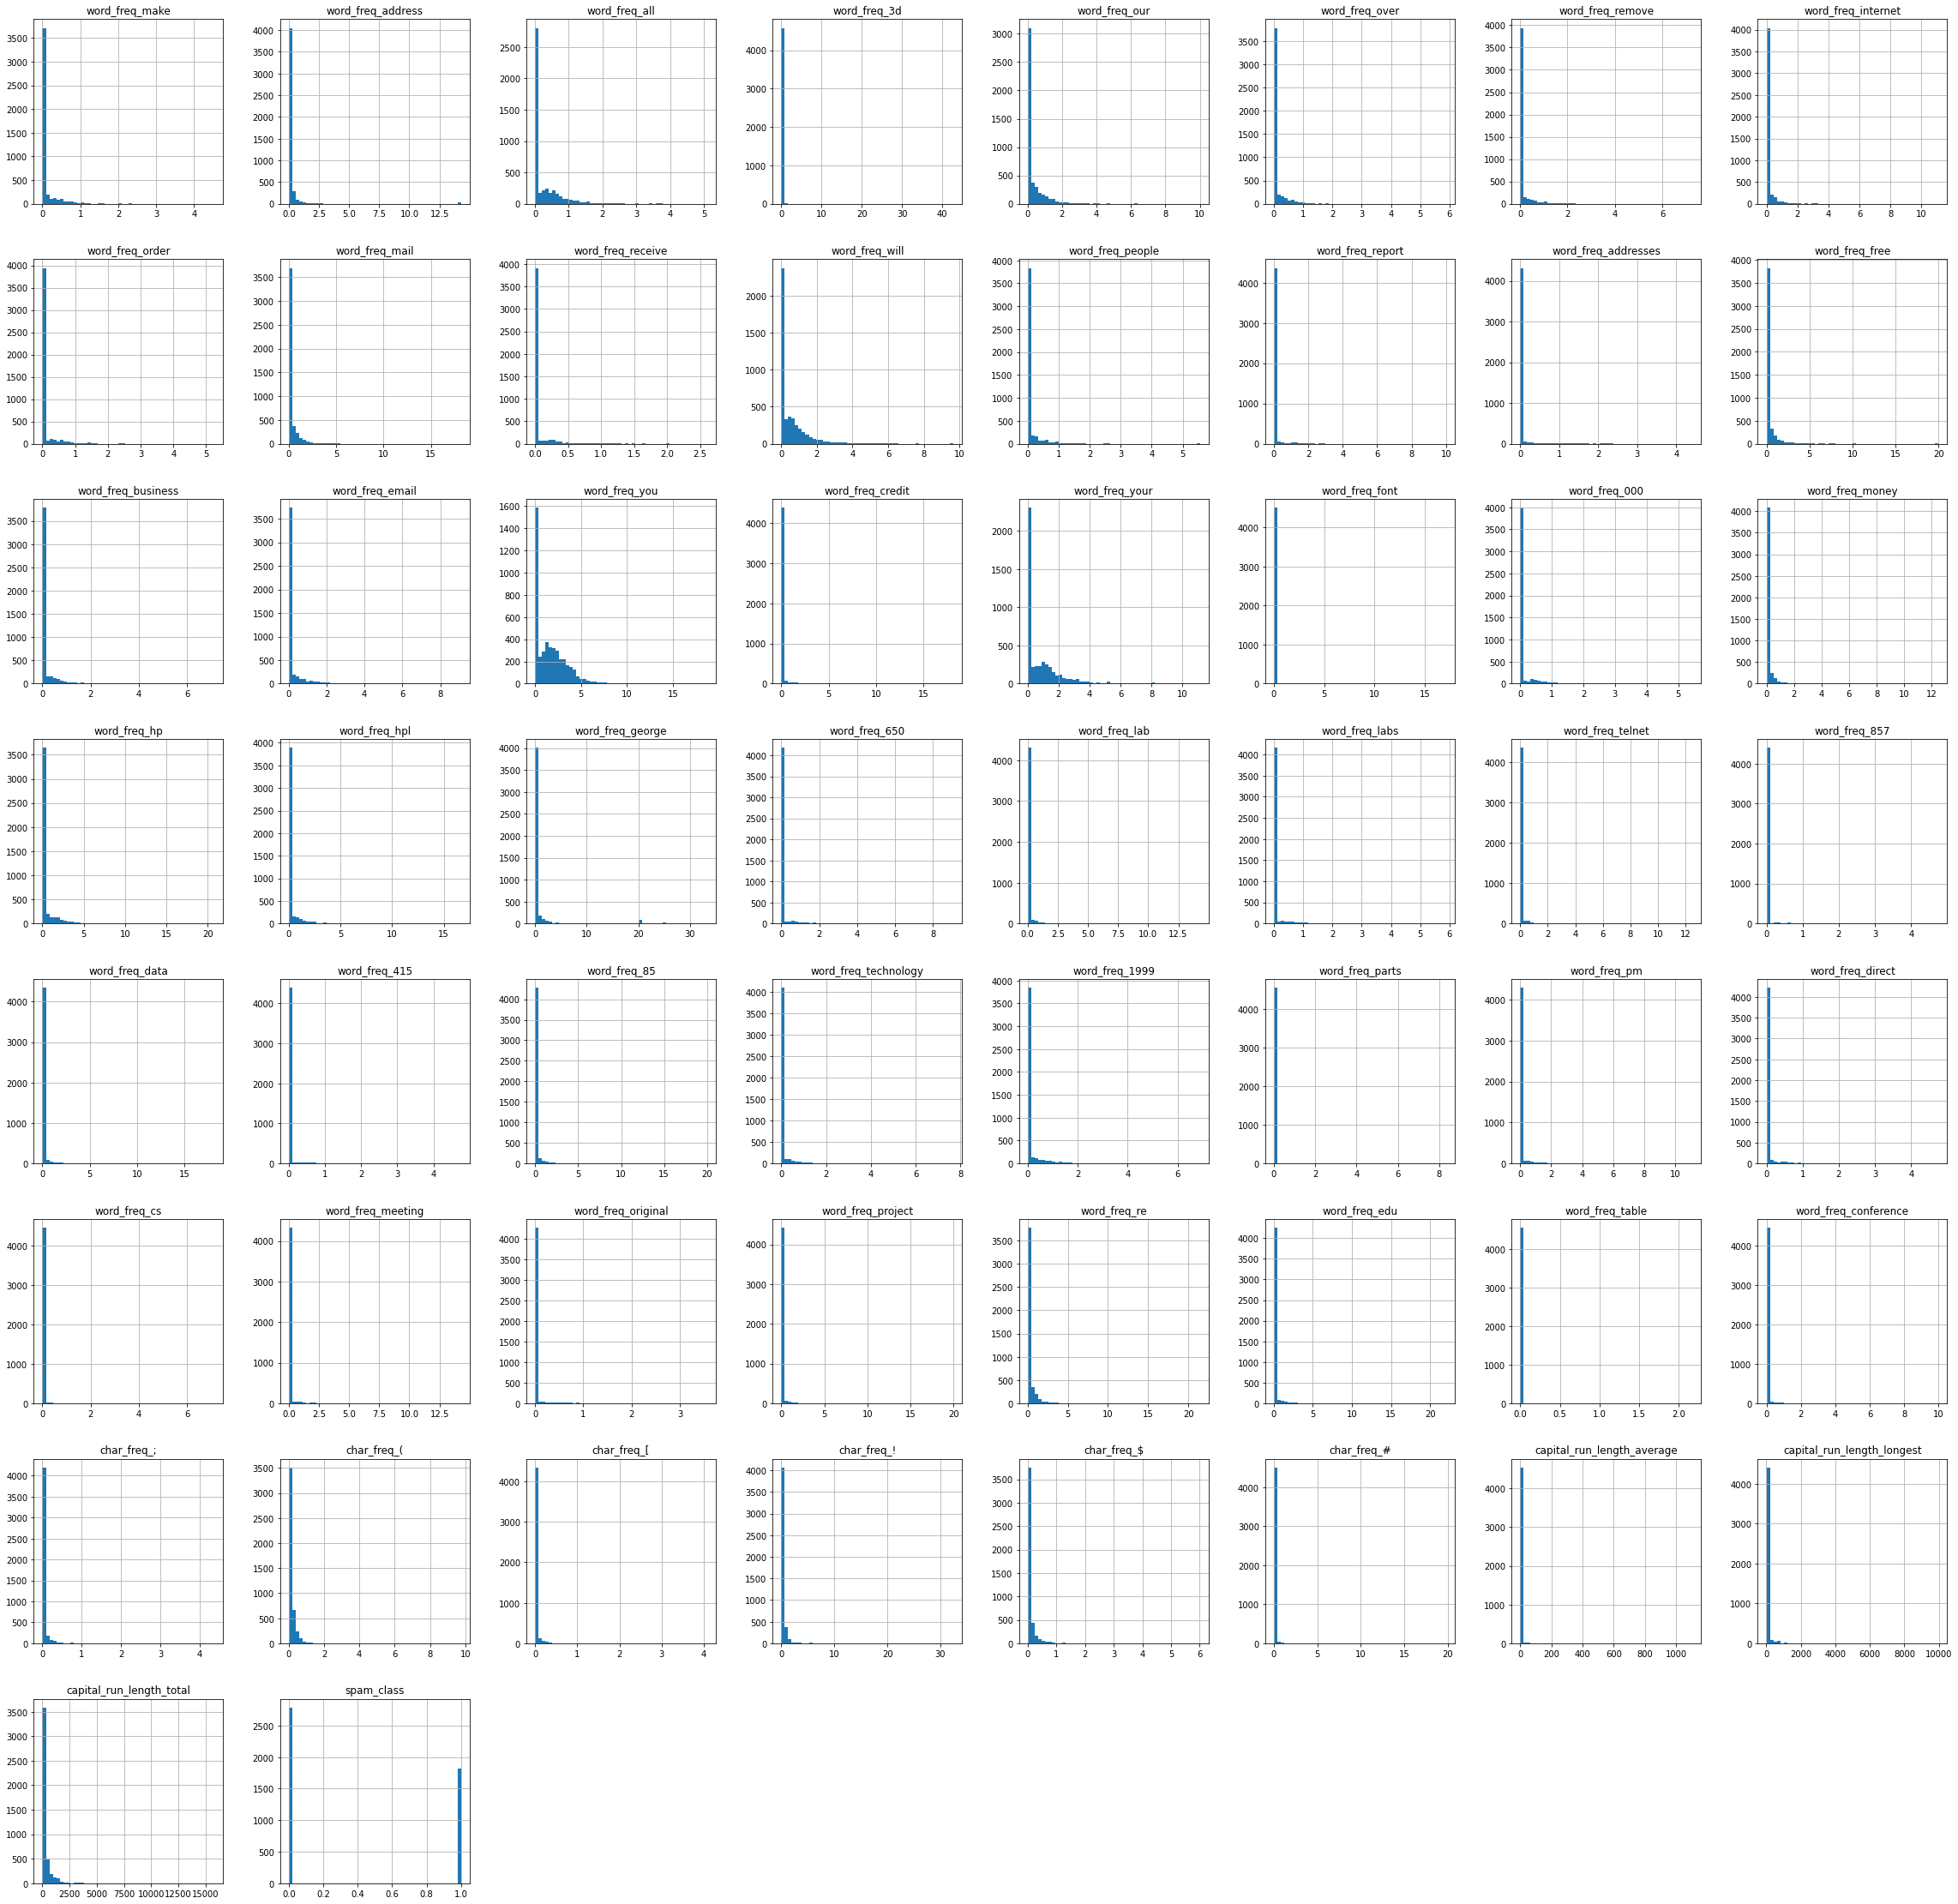

In [ ]:
# plotting histograms
spam_df.hist(bins=50, figsize=(40,40))
plt.show()

# Splitting the data and applying the Model

1.) Performing Cross Validation for 8 steps

2.) Applying the following models
*   Logistic Regression model
*   Random Forest Classifier
*   K Nearest Neighbour  
*   Neural Networks
*   SVM Classifier
*   Adaboost
*   Catboost
3.) Choosing the best model on the basis of the AUC_ROC Score

4.) Finding the Average False Positive Rate, Average False Negative Rate and Average Error Rate for the model.

5.) Creating the table for the best performing Model.
 


In [58]:
# The following models have been used for the classification task.
# All the models have been fine tuned for the task
# Logistic Regression => The simplest Classification Model. Elastic Net Regularisation is used to reduce the impact of less important attributes.
#                        Had to keep the iterations to 8000 because it was not converging otherwise 
# KNeighbors Classifier => Supervised Classification Algorithm that classifies the data point on the basis of the points that are nearest to it. 
#                     It assumes that the similiar points are closer to each other than others.
# Random Forest Classifier => RFC is an Emsemble Algorithm, group of decision tree combined together that classify the data points on the basis of the mean, mode or other 
#                      metrics. It corrects the overfitting of decision tree and gives better accuracy than most of the models. 
#                      But the gradient boosting models usually give more accuracy than other machine learning models.
# NOTE => According to François Chollet, author of Deep Learning with Python, most of the models used in kaggle competition between 2016-2017 were
# either gradient boosting or Neural Networks.
# MLP (Neural Networks) => Neural Networks are one of newest editions to the Machine Learning Rooster and they are quite popular and good at what they do.
#                          They are layered structure containing many neurons connected in different layers. They are robust in classifying data and images.
# AdaBoost Classifier => Adaptive Boosting is the ensemble boosting classifier. AdaBoost is an iterative ensemble method.
#                        It builds a strong classifier by combining multiple poorly performing classifiers so that you will get high accuracy strong classifier
# CatBoost Classifier => CatBoost based on gradient boosting, is developed by Yandex outperforms many existing boosting algorithms like XGBoost, Light GBM. ...
#                        On the other hand, CatBoost is easy to implement and very powerful. It provides excellent results in its very first run.
classifiers = [
              LogisticRegression(random_state=0,penalty='elasticnet',solver='saga',l1_ratio = 0.8,max_iter=8000),
              KNeighborsClassifier(10),
              RandomForestClassifier(max_depth=9, random_state=1,min_samples_split=3),
              MLPClassifier(hidden_layer_sizes = (58,58,29,10),max_iter=500,learning_rate_init=0.001,learning_rate='adaptive',solver='adam',random_state=12),
              AdaBoostClassifier(random_state=4),
              CatBoostClassifier(iterations=60,learning_rate=0.8,depth = 9,silent=True),
]
# Names of the models that are used
names = [
         'LogisticRegression',
         'KNeighbors Classificaition',
         'Random Forest Classifier',
         "Neural Network",
         "Adaboost Classifier",
         'CatBoost Classifier'
]

Links for the official documentation of the implementation of the following models

Logistic Regression =>  https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

KNeighbors Classificaition =>  https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

Random Forest Classifier =>   https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

Neural Network =>  https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPClassifier.html

Adaboost Classifier =>  https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html

CatBoost Classifier =>   https://catboost.ai/docs/concepts/python-reference_catboostclassifier.html


In [66]:
# The main reason for choosing the AUC Score is that accuracy can sometimes mislead,
# Hence choosing the AUC Score as it helps to minimise the false positives and false negatives.
X = spam_df.values[:,:-1] # Taking all the values in the X array.
Y = np.array(spam_df['spam_class']) # Taking all the target values in the Y array.
k_cross = 8 # Number of Cross Validation steps
max_score = -1
index = -1. # Index to store the best performing model

# MATRIX for storing all the metrics for all the models,then will choose the best model
matrix_metrics = []

for i in range(len(classifiers)):
  temp = 0
  print("Applying the Model == >> "+names[i])
  fp = []
  fn = []
  avge = []
  for j in range(k_cross):
    train_x, valid_x, train_y, valid_y = train_test_split(X, Y, test_size=0.3, random_state=j) # Splitting the data set into train and validation
    classifiers[i].fit(train_x,train_y)
    predict_y = classifiers[i].predict(valid_x)
    auc = roc_auc_score(valid_y,predict_y)
    temp += auc

    matrix = confusion_matrix(valid_y,predict_y)
    false_positive_rate = matrix[0][1]/(matrix[0][1] + matrix[0][0])
    false_negative_rate = matrix[1][0]/(matrix[1][0] + matrix[1][1])
    fp.append(false_positive_rate)
    fn.append(false_negative_rate)
    avge.append(1 - accuracy_score(valid_y,predict_y))

    # Printing all the information 
    print("The False Negative Rate is ",false_negative_rate)
    print("The False Positive Rate is ",false_positive_rate)
    print("The Total Error Rate is ",1-accuracy_score(valid_y,predict_y))
    print("AUC Score is",auc)
    print('Confusion Matrix is')
    print(matrix) 


  temp /= k_cross
  print("The average AUC Score is ",temp)
  print('-'*40)
  if temp > max_score:
    max_score = temp
    index = i
  # appending all the information to the main metric matrix
  matrix_metrics.append([fp,fn,avge])


print("The Best Performing Model is")
names[index]

Applying the Model == >> LogisticRegression


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.008944543828264758
The False Positive Rate is  0.7992700729927007
The Total Error Rate is  0.4793627805937726
AUC Score is 0.5958926915895173
Confusion Matrix is
[[165 657]
 [  5 554]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.012962962962962963
The False Positive Rate is  0.7621878715814506
The Total Error Rate is  0.4692251991310644
AUC Score is 0.6124245827277932
Confusion Matrix is
[[200 641]
 [  7 533]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.0017667844522968198
The False Positive Rate is  0.8134969325153374
The Total Error Rate is  0.4808110065170167
AUC Score is 0.5923681415161829
Confusion Matrix is
[[152 663]
 [  1 565]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.0055248618784530384
The False Positive Rate is  0.8221957040572793
The Total Error Rate is  0.501086169442433
AUC Score is 0.5861397170321339
Confusion Matrix is
[[149 689]
 [  3 540]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.0037593984962406013
The False Positive Rate is  0.8268551236749117
The Total Error Rate is  0.5097755249818972
AUC Score is 0.5846927389144239
Confusion Matrix is
[[147 702]
 [  2 530]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.003780718336483932
The False Positive Rate is  0.8251173708920188
The Total Error Rate is  0.5104996379435192
AUC Score is 0.5855509553857486
Confusion Matrix is
[[149 703]
 [  2 527]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.005607476635514018
The False Positive Rate is  0.8475177304964538
The Total Error Rate is  0.5213613323678494
AUC Score is 0.573437396434016
Confusion Matrix is
[[129 717]
 [  3 532]]


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


The False Negative Rate is  0.008818342151675485
The False Positive Rate is  0.8513513513513513
The Total Error Rate is  0.5054308472121651
AUC Score is 0.5699151532484866
Confusion Matrix is
[[121 693]
 [  5 562]]
The average AUC Score is  0.5875526721060379
----------------------------------------
Applying the Model == >> KNeighbors Classificaition
The False Negative Rate is  0.3810375670840787
The False Positive Rate is  0.13260340632603407
The Total Error Rate is  0.23316437364228815
AUC Score is 0.7431795132949436
Confusion Matrix is
[[713 109]
 [213 346]]
The False Negative Rate is  0.34814814814814815
The False Positive Rate is  0.13555291319857313
The Total Error Rate is  0.21868211440984797
AUC Score is 0.7581494693266394
Confusion Matrix is
[[727 114]
 [188 352]]
The False Negative Rate is  0.37985865724381623
The False Positive Rate is  0.11779141104294479
The Total Error Rate is  0.225199131064446
AUC Score is 0.7511749658566195
Confusion Matrix is
[[719  96]
 [215 351]]
Th

'CatBoost Classifier'

In [64]:
# All the average scores 
avg_fp = 0
avg_fn = 0 
avg_e = 0
# Lists to store the average scores 
fp = matrix_metrics[index][0]
fn = matrix_metrics[index][1]
avge = matrix_metrics[index][2]
# Finding average scores for the best performing model
for k in fp:
  avg_fp += k
for k in fn:
  avg_fn += k
for k in avge:
  avg_e += k 

In [65]:
# Creating the final result table
Table = pd.DataFrame(list(zip(np.arange(1,k_cross+1),fp,fn,avge)),columns = ['Cross_validation step','False Positive Rate','False Negative Rate','Overall Error Rate'])
Table.loc[k_cross] = [k_cross+1,avg_fp,avg_fn,avg_e]
# The last row shows the average of all the values.
Table['Cross_validation step'].replace([k_cross+1],['Average_Scores'],inplace = True)

print("The best performing model is => ",names[index],"!!!! ")
print("The rates are out of 1, 1 means 100 percent")
print("The final result table is => ")
Table

The best performing model is =>  CatBoost Classifier !!!! 
The rates are out of 1, 1 means 100 percent
The final result table is => 


,Cross_validation step,False Positive Rate,False Negative Rate,Overall Error Rate
0,1,0.030414,0.080501,0.050688
1,2,0.034483,0.051852,0.041274
2,Average_Scores,0.064896,0.132353,0.091962
